In [22]:
# Import dataset in Pandas
from numpy import random
import pandas as pd
import time

# Read the IMDB .CSV dataset file
df = pd.read_csv(r'C:/Users/Asus/Desktop/QuizProject/imdb_top_1000.csv')

class Quiz:
   def __init__(self, df):
       self.df = df
       self.difficulty = self.choose_difficulty()
       difficulty_points = {
        1: 5, # Easy
        2: 10, # Medium
        3: 20, # Hard
        4: 30  # Extreme
        }
       self.points = difficulty_points[self.difficulty]
       self.penalty = self.points // 2 # Half of the points for the difficulty level
       self.score = 0

   def choose_difficulty(self):
       print("Choose your difficulty level:")
       print("1. Easy")
       print("2. Medium")
       print("3. Hard")
       print("4. Extreme")
       while True:
           try:
               difficulty = int(input("Enter a number between 1 and 4: "))
               if 1 <= difficulty <= 4:
                  return difficulty
               else:
                  print("Invalid choice. Please choose a number between 1 and 4.")
           except ValueError:
               print("Invalid choice. Please enter a number.")
    
   def create_quiz(self):
       # Replace non-standard missing values with NaN
       self.df = self.df.replace("", "NaN")
       
       # Drop rows with NaN values
       self.df = self.df.dropna()

       random_row = self.df.sample(1)

       actor = random_row['Star1'].values[0]
       actor2 = random_row['Star2'].values[0]
       director = random_row['Director'].values[0]
       runtime = random_row['Runtime'].values[0]
       genre = random_row['Genre'].values[0].split(',')[0] # Split the genres and select the first one
       year = random_row['Released_Year'].values[0]
       film = random_row['Series_Title'].values[0]

       # Adjust the amount of information based on the difficulty level
       if self.difficulty == 1: # Easy
           question = f"What is the {genre} film directed by {director} starring {actor} and {actor2} released in {year} with a runtime of {runtime}?"
       elif self.difficulty == 2: # Medium
           question = f"What is the {genre} film directed by {director} starring {actor} and {actor2} released in {year}?"
       elif self.difficulty == 3: # Hard
           question = f"What is the {genre} film directed by {director} starring {actor} released in {year}?"
       elif self.difficulty == 4: # Extreme
           question = f"What is the {genre} film directed by {director} starring {actor}"

       choices = [film]
       while len(choices) < 4:
           random_film = self.df['Series_Title'].sample(1).values[0]
           if random_film not in choices:
               choices.append(random_film)

       random.shuffle(choices)

       return question, choices, film

   def play_quiz(self, num_questions=5):
        # Define points for each difficulty level
        difficulty_points = {
         1: 5, # Easy
         2: 10, # Medium
         3: 20, # Hard
         4: 30 # Extreme
        }
        for i in range(num_questions):
           question, choices, correct_answer = self.create_quiz()
           print(question)
           for j, choice in enumerate(choices, start=1):
               print(f"{j}. {choice}")
           time.sleep(1) # Add a small delay
           
           # Get player's choice
           while True:
               answer = int(input("Enter the number of your answer (1-4): "))
               if 1 <= answer <= 4:
                  break
               else:
                  print("Invalid choice. Please choose a number between 1 and 4.") 
           if choices[answer - 1] == correct_answer:
               print("Correct!")
               self.score += self.points
           else:
               print("Incorrect. The correct answer was", correct_answer)
               self.score -= self.penalty
           if i < num_questions - 2: # If it's not the last question
               print(f"Your current score is {self.score}")
             # Calculate the maximum possible score
        max_score = num_questions * difficulty_points[self.difficulty]
        if self.score == max_score:
         print(f"Your final score is {self.score}. Congratulations you got a perfect score!")
        else:
           print(f"Your final score is {self.score}")

# Start Quiz
quiz = Quiz(df)
quiz.play_quiz()

Choose your difficulty level:
1. Easy
2. Medium
3. Hard
4. Extreme
What is the Comedy film directed by Damián Szifron starring Darío Grandinetti released in 2014?
1. Relatos salvajes
2. Rio Bravo
3. No Country for Old Men
4. Apocalypto
Incorrect. The correct answer was Relatos salvajes
Your current score is -10
What is the Action film directed by Taika Waititi starring Chris Hemsworth released in 2017?
1. Lock, Stock and Two Smoking Barrels
2. Dogville
3. Todo sobre mi madre
4. Thor: Ragnarok
Incorrect. The correct answer was Thor: Ragnarok
Your current score is -20
What is the Drama film directed by Clint Eastwood starring Clint Eastwood released in 1992?
1. Raging Bull
2. Die Hard
3. Unforgiven
4. 1917
Correct!
Your current score is 0
What is the Animation film directed by Pete Docter starring Bob Peterson released in 2009?
1. Raging Bull
2. Up
3. The Naked Gun: From the Files of Police Squad!
4. Madeo
Incorrect. The correct answer was Up
What is the Action film directed by John McTi

In [23]:
df.columns.values.tolist()

['Poster_Link',
 'Series_Title',
 'Released_Year',
 'Certificate',
 'Runtime',
 'Genre',
 'IMDB_Rating',
 'Overview',
 'Meta_score',
 'Director',
 'Star1',
 'Star2',
 'Star3',
 'Star4',
 'No_of_Votes',
 'Gross']

Choose your difficulty level:
1. Easy
2. Medium
3. Hard
4. Extreme


What is the Drama film directed by Bob Fosse starring Roy Scheider and Jessica Lange released in 1979 with a runtime of 123 min?
1. The Lord of the Rings: The Fellowship of the Ring
2. The King of Comedy
3. Der Name der Rose
4. All That Jazz
Incorrect. The correct answer was All That Jazz
Your current score is -2
What is the Crime film directed by Alejandro G. Iñárritu starring Sean Penn and Benicio Del Toro released in 2003 with a runtime of 124 min?
1. Touch of Evil
2. Zombieland
3. 21 Grams
4. Synecdoche, New York
Correct!
Your current score is 3
What is the Biography film directed by David Lynch starring Richard Farnsworth and Sissy Spacek released in 1999 with a runtime of 112 min?
1. Short Term 12
2. The Longest Day
3. The Straight Story
4. Todo sobre mi madre
Incorrect. The correct answer was The Straight Story
Your current score is 1
What is the Comedy film directed by Billy Wilder starring Marilyn Monroe and Tony Curtis released in 1959 with a runtime of 121 min?
1. 3 Idiots
2

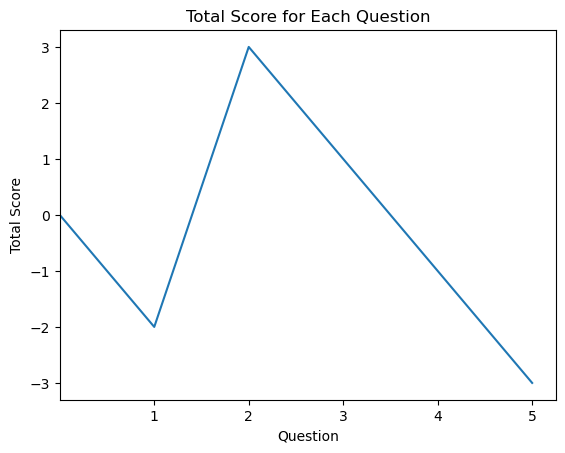

In [41]:
# Import dataset in Pandas
from numpy import random
import pandas as pd
import time
import matplotlib.pyplot as plt


# Read the IMDB .CSV dataset file
df = pd.read_csv(r'C:/Users/Asus/Desktop/QuizProject/imdb_top_1000.csv')

class Quiz:
   def __init__(self, df):
       self.df = df
       self.difficulty = self.choose_difficulty()
       difficulty_points = {
        1: 5, # Easy
        2: 10, # Medium
        3: 20, # Hard
        4: 30  # Extreme
        }
       self.points = difficulty_points[self.difficulty]
       self.penalty = self.points // 2 # Half of the points for the difficulty level
       self.score = 0

   def choose_difficulty(self):
       print("Choose your difficulty level:")
       print("1. Easy")
       print("2. Medium")
       print("3. Hard")
       print("4. Extreme")
       while True:
           try:
               difficulty = int(input("Enter a number between 1 and 4: "))
               if 1 <= difficulty <= 4:
                  return difficulty
               else:
                  print("Invalid choice. Please choose a number between 1 and 4.")
           except ValueError:
               print("Invalid choice. Please enter a number.")
    
   def create_quiz(self):
       # Replace non-standard missing values with NaN
       self.df = self.df.replace("", "NaN")
       
       # Drop rows with NaN values
       self.df = self.df.dropna()

       random_row = self.df.sample(1)

       actor = random_row['Star1'].values[0]
       actor2 = random_row['Star2'].values[0]
       director = random_row['Director'].values[0]
       runtime = random_row['Runtime'].values[0]
       genre = random_row['Genre'].values[0].split(',')[0] # Split the genres and select the first one
       year = random_row['Released_Year'].values[0]
       film = random_row['Series_Title'].values[0]

       # Adjust the amount of information based on the difficulty level
       if self.difficulty == 1: # Easy
           question = f"What is the {genre} film directed by {director} starring {actor} and {actor2} released in {year} with a runtime of {runtime}?"
       elif self.difficulty == 2: # Medium
           question = f"What is the {genre} film directed by {director} starring {actor} and {actor2} released in {year}?"
       elif self.difficulty == 3: # Hard
           question = f"What is the {genre} film directed by {director} starring {actor} released in {year}?"
       elif self.difficulty == 4: # Extreme
           question = f"What is the {genre} film directed by {director} starring {actor}"

       choices = [film]
       while len(choices) < 4:
           random_film = self.df['Series_Title'].sample(1).values[0]
           if random_film not in choices:
               choices.append(random_film)

       random.shuffle(choices)

       return question, choices, film

   def play_quiz(self, num_questions=5):
        # Define points for each difficulty level
        difficulty_points = {
         1: 5, # Easy
         2: 10, # Medium
         3: 20, # Hard
         4: 30 # Extreme
        }
        score_changes = [0] # List to store score changes for each question, starting with 0
        for i in range(num_questions):
           question, choices, correct_answer = self.create_quiz()
           print(question)
           for j, choice in enumerate(choices, start=1):
               print(f"{j}. {choice}")
           time.sleep(1) # Add a small delay
           
           # Get player's choice
           while True:
               answer = int(input("Enter the number of your answer (1-4): "))
               if 1 <= answer <= 4:
                  break
               else:
                  print("Invalid choice. Please choose a number between 1 and 4.") 
           if choices[answer - 1] == correct_answer:
               print("Correct!")
               self.score += self.points
               score_changes.append(self.score) # Add total score to the list
           else:
               print("Incorrect. The correct answer was", correct_answer)
               self.score -= self.penalty
               score_changes.append(self.score) # Add total score to the list
           if i < num_questions - 2: # If it's not the last question
               print(f"Your current score is {self.score}")
        # Calculate the maximum possible score
        max_score = num_questions * difficulty_points[self.difficulty]
        if self.score == max_score:
         print(f"Your final score is {self.score}. Congratulations you got a perfect score!")
        else:
         print(f"Your final score is {self.score}")
        # Create a line chart
        plt.plot(score_changes)
        plt.xlabel('Question')
        plt.ylabel('Total Score')
        plt.title('Total Score for Each Question')
        plt.xlim(xmin=0) # Set x-axis to start at 0
        plt.xticks(range(1, num_questions + 1)) # Set x-axis in 1 unit increments
        plt.show()

# Start Quiz
quiz = Quiz(df)
quiz.play_quiz()